# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

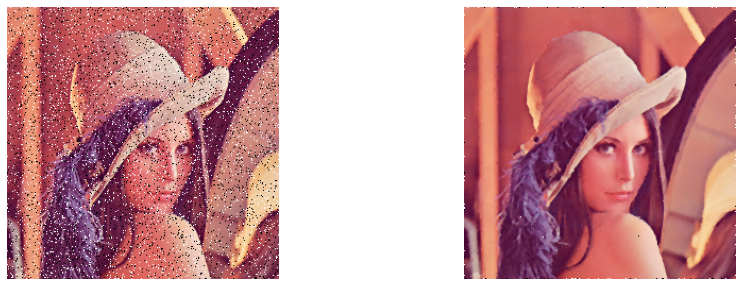

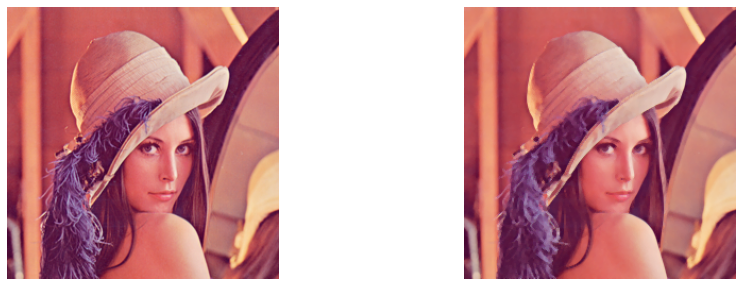

In [1]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
import os
import copy

if not os.path.exists("lenaRGB.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaRGB.png --no-check-certificate
if not os.path.exists("lenaRGBSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaRGBSzum.png --no-check-certificate
        
        
def med(x,window):
    I = cv2.imread(x)
    I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    X = I.shape[0]
    Y = I.shape[1]
    Z = I.shape[2]
    I2 = copy.deepcopy(I)
    
    temp = []
    w = window // 2
    
    for i in range(X):
        for j  in range(Y):
            row_up = i - w
            row_down = i + w +1
            
            col_left = j - w
            col_right = j + w + 1
            
            if 0 <= row_up  and row_down <= X and 0 <= col_left and col_right <= Y:
                temp = np.array(I[row_up : row_down, col_left : col_right, :],  dtype=np.int32)
                r = temp.shape[0]
                c = temp.shape[1]
                s = temp.shape[2]
                
                dst = np.zeros((r,c))
                
                for k in range(r):
                    for l  in range(c):
                        rgb_r = temp - temp[k,l,:]
                        rgb_k = np.square(rgb_r)
                        rgb_s = np.sum(rgb_k, axis=2)
                        rgb_p = np.sqrt(rgb_s)
                        
                        dst[k,l] = np.sum(rgb_p)
                        
                amin = np.argmin(dst)
                I2[i,j] = temp[np.unravel_index(amin,(r,c))]
    
    f, a = plt.subplots(1, 2)
    f.set_size_inches(15,5)
    a[0].imshow(I)
    a[0].axis('off')
    a[1].imshow(I2)
    a[1].axis('off')                       
        

        
med("lenaRGBSzum.png",3)
med("lenaRGB.png",3)